In [9]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=1000, n_features=2, n_informative=1, n_redundant=0, n_clusters_per_class = 1,n_classes = 2,random_state=41, hypercube = False, class_sep = 10)
print(X.shape, y.shape)

(1000, 2) (1000,)


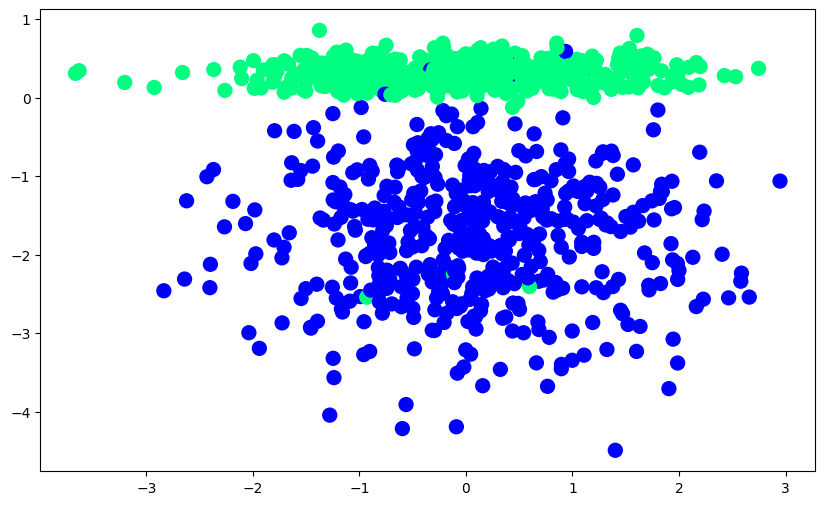

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1], c=y,cmap='winter',s = 100)
plt.show()

In [17]:
def perceptron(X,y):

  X = np.insert(X,0,1,axis=1) #added xo
  w = np.ones(X.shape[1])
  lr = 0.1

  for i in range(1000):
      j = np.random.randint(0,100) # select random value b/w 0 and 100 for selecting row
      y_hat = step(np.dot(w,X[j])) #prediction for row
      w = w + lr*(y[j]-y_hat)*X[j]
  return w[0],w[1:]

In [18]:
# Add the bias term (1) to X[41] before performing the dot product
np.dot(np.insert(X[41], 0, 1), [1, 1, 1])

np.float64(1.1859581295467385)

In [19]:
def step(z):
  return 1 if z>0 else 0

In [20]:
intercept_,coef_ = perceptron(X,y)

In [21]:
print(coef_)
print(intercept_)

[0.3129636  1.57084807]
0.6000000000000001


In [22]:
m = -coef_[0]/coef_[1]
c = -intercept_/coef_[1]

In [23]:
x_vals = np.linspace(np.min(X[:, 0]) - 1, np.max(X[:, 0]) + 1, 100)
y_vals = m * x_vals + c   # for prediction on data

* Plotting: We pick 100 x-values across our data range (x_vals) and calculate their y-values on the boundary line (y_vals = m*x + c). This gives the visual separation between predicted classes.

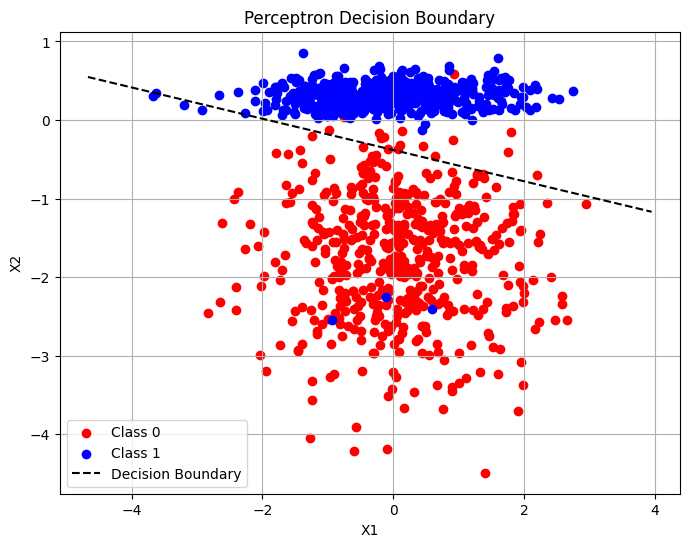

In [27]:
# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')

# Decision boundary
plt.plot(x_vals, y_vals, '--k', label='Decision Boundary')

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Perceptron Decision Boundary')
plt.legend()
plt.grid(True)
plt.show()